In [ ]:
#NOTE: STUDENT ID AND CORRESPONDING STUDENT ID LETTERS WOULD BE

# 5 0 1 0 3 2 5 4 2
# A B C D E F G H I

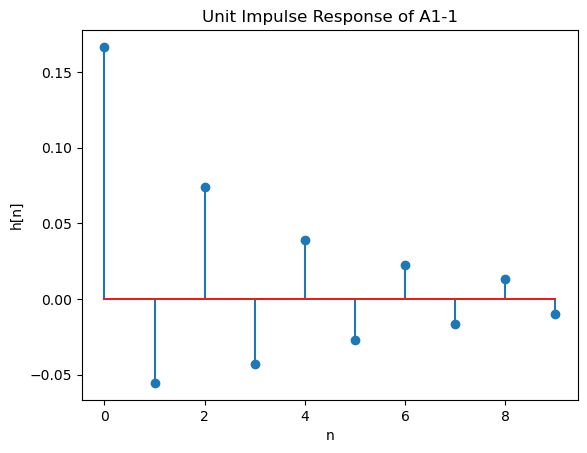

In [20]:
#A1-1

import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

n = np.arange(0,10)
delta = lambda n:(1.0*(n==0))
E = np.array([1/6, 0, 0])
Q = np.array([1, 1/3, -1/3])

#signal.lfiltic(Q, E, delta(n))
h = signal.lfilter(E, Q, delta(n))


plt.stem(n,h)
plt.title('Unit Impulse Response of A1-1')
plt.xlabel('n')
plt.ylabel('h[n]')
plt.show()


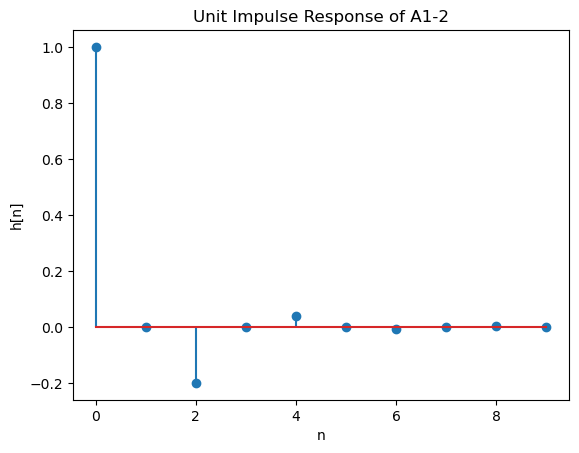

In [74]:
#A1-2

import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

n = np.arange(0,10)
delta = lambda n:(1.0*(n==0))
E = np.array([1, 0, 0])
Q = np.array([1, 0, 1/5])

#signal.lfiltic(Q, E, delta(n))
h = signal.lfilter(E, Q, delta(n))

plt.stem(n,h)
plt.title('Unit Impulse Response of A1-2')
plt.xlabel('n')
plt.ylabel('h[n]')
plt.show()


In [ ]:
#A2 and A3 were done on paper, by hand, and will be attached separately in the submission as .png files

In [ ]:
#Small note: My 'D' value from my student number is 0, so the graph is for a very small amount. Change the values of the associated unit spet functions, to see a longer version of the graph.

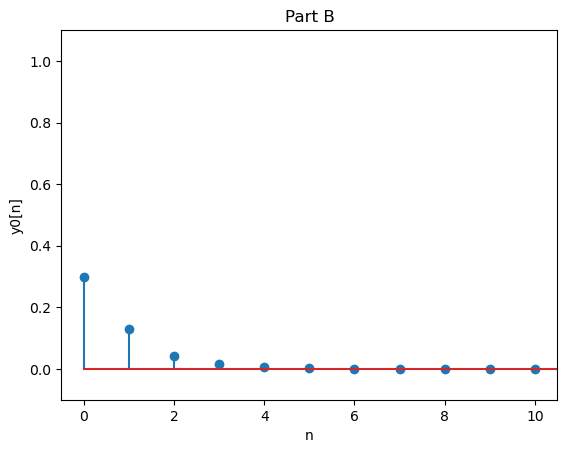

In [34]:
#Part B

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lfilter, lfiltic

b = [2, 0, 0]
a = [1, -1/10, -1/10]

z_i = lfiltic(b, a, [1, 2])
n = np.arange(0, 51)
x = np.zeros(n.shape)
y_0, _ = lfilter(b, a, x, zi=z_i)

plt.stem(n, y_0)
plt.title('Part B')
plt.axis([-0.5, 10.5, -0.1, 1.1])
plt.xlabel('n')
plt.ylabel('y0[n]')
plt.show()


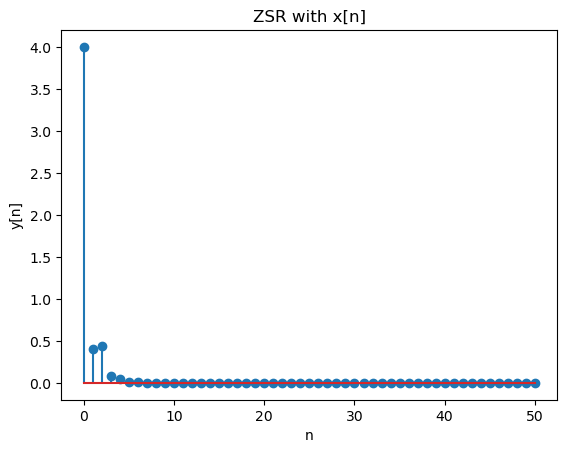

In [38]:
#Part C

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lfilter, lfiltic, square

E = [2, 0, 0]
Q = [1, -1/10, -1/10]

n = np.arange(0, 51)
x = 2 * np.cos(2 * np.pi * n) * (np.heaviside(n, 1) - np.heaviside(n - 1, 1))
y = lfilter(E, Q, x)

plt.stem(n, y)
plt.title('ZSR with x[n]')
plt.xlabel('n')
plt.ylabel('y[n]')
plt.show()

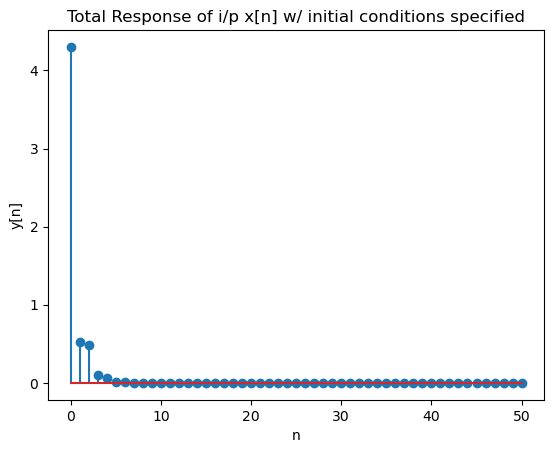

In [41]:
#PART D-1

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lfilter, lfiltic, square

b = [2, 0, 0]
a = [1, -1/10, -1/10]

n = np.arange(0, 51)
x = 2 * np.cos(2 * np.pi * n) * (np.heaviside(n, 1) - np.heaviside(n - 1, 1))
z_i = lfiltic(b, a, [1, 2])
y, _ = lfilter(b, a, x, zi=z_i)

plt.stem(n, y)
plt.title('Total Response of i/p x[n] w/ initial conditions specified')
plt.xlabel('n')
plt.ylabel('y[n]')
plt.show()

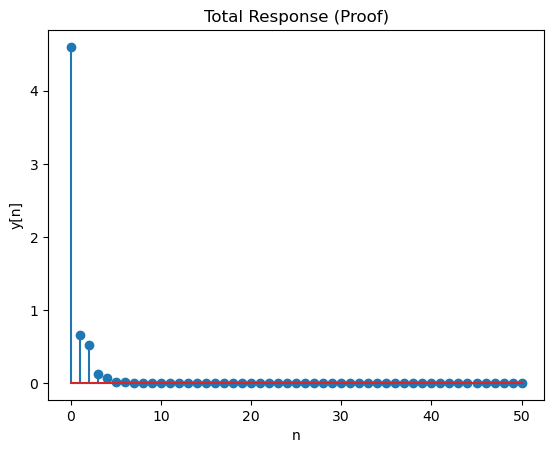

In [42]:
#D-2

#Yes this is feasible. From just looking, it appears this has been done to come up with the Total Response. 
#Here, we have double checked this by doing both calculations, adding and plotting them on the same graph
#To check and make sure that both graphs would be identical, and they are.

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lfilter, lfiltic, square

b = [2, 0, 0]
a = [1, -1/10, -1/10]

n = np.arange(0, 51)
x = 2 * np.cos(2 * np.pi * n) * (np.heaviside(n, 1) - np.heaviside(n - 1, 1))

z_i = lfiltic(b, a, [1, 2])
y1, _ = lfilter(b, a, x, zi=z_i)

z_i = lfiltic(b, a, [1, 2])
y0 = lfilter(b, a, np.zeros_like(n), zi=z_i)[0]

y = y0 + y1

plt.stem(n, y)
plt.title('Total Response (Proof)')
plt.xlabel('n')
plt.ylabel('y[n]')
plt.show()


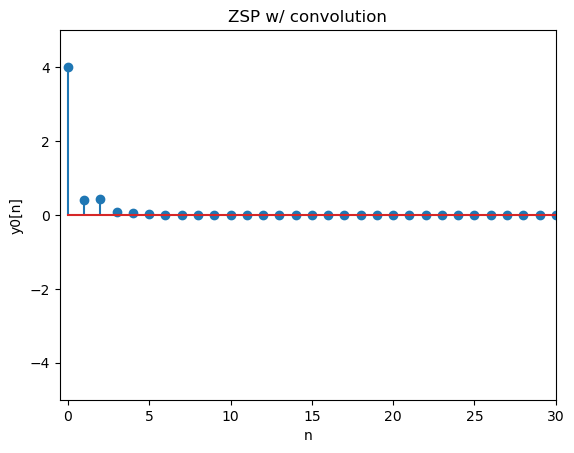

In [71]:
#Part E-1

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lfilter, convolve

n = np.arange(0, 51)
u = np.where(np.mod(n,1)==0, 1.0, 0.0) * np.where(n>=0, 1.0, 0.0)
u2 = np.where(np.mod(n,1)==0, 1.0, 0.0) * np.where(n>=1, 1.0, 0.0)
b = np.array([2, 0, 0])
a = np.array([1, -1/10, -1/10])
x = 2. * np.cos((2. * np.pi * n) / 1) * (u - u2)

delta = np.where(n==0, 1, 0)

h = lfilter(b, a, delta)

y = convolve(x, h)

n = np.arange(0, 101)

plt.stem(n, y)
plt.title('ZSP w/ convolution')
plt.axis([-0.5, 30, -5, 5])
plt.xlabel('n')
plt.ylabel('y0[n]')
plt.show()

In [2]:
#Part E-2

# The results appear to be identical in the graphs.

#Part E-3

# Yes, the system is asymptotically stable, as two real roots exist withing the Unit Circle.

In [73]:
#Part F-1

#We can see by convolving h[k] with x[n-k] from 0 to infinity and so we can say 
#the constant coefficient difference equation for the N-point moving average filter is:
#y[n] = (1/N) (x[n] + x[n − 1] + ... + x[n − (N − 1)])


Text(0, 0.5, 'h[n]')

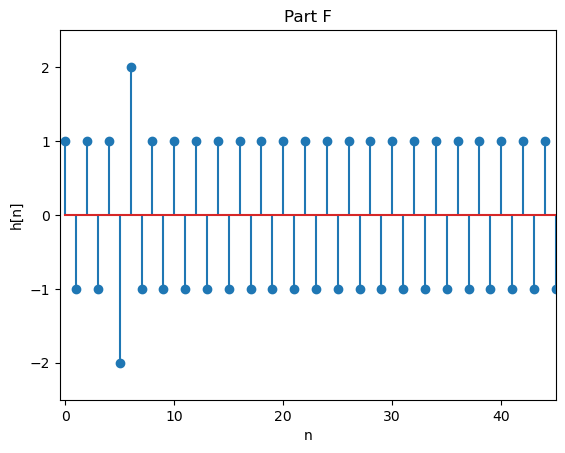

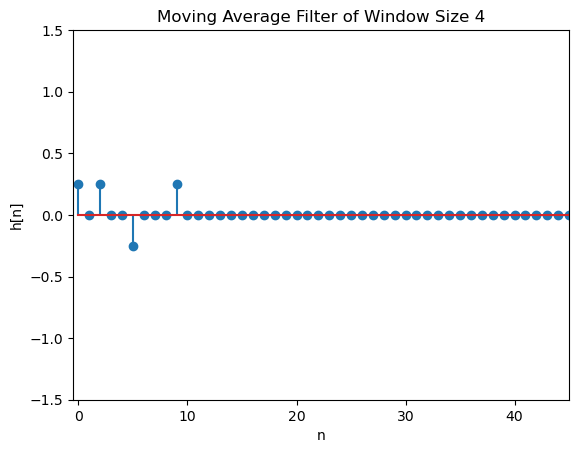

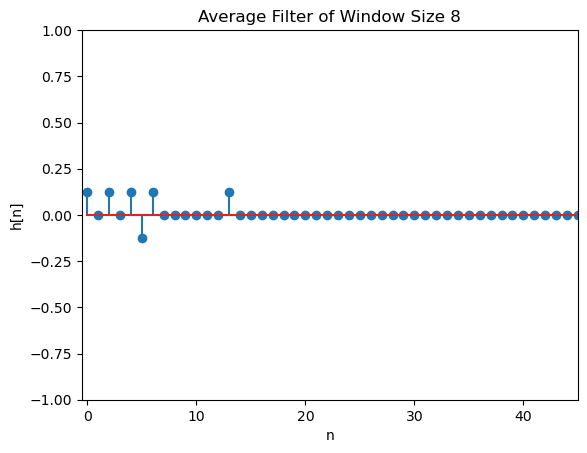

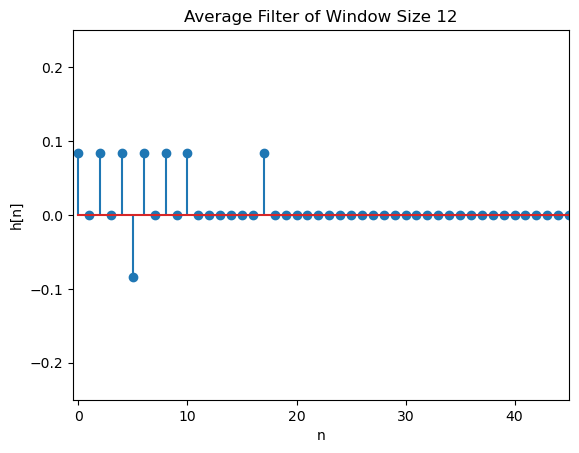

In [78]:
#Part F-3

import numpy as np
import matplotlib.pyplot as plt

n = np.arange(0, 46, 1)
d = (n-6)==0
d2 = (n-5)==0
a = 1

x = np.cos((np.pi*n)/1) + d - d2

# original function
plt.figure()
plt.stem(n, x)
plt.title('Part F')
plt.axis([-0.5, 45, -2.5, 2.5])
plt.xlabel('n')
plt.ylabel('h[n]')

# N=4
filterN = 4
b = np.ones(filterN)/filterN
h = np.convolve(b, x)
plt.figure()
plt.stem(n, h[:len(n)])
plt.title('Moving Average Filter of Window Size 4')
plt.axis([-0.5, 45, -1.5, 1.5])
plt.xlabel('n')
plt.ylabel('h[n]')

# N=8
filterN = 8
b = np.ones(filterN)/filterN
h = np.convolve(b, x)
plt.figure()
plt.stem(n, h[:len(n)])
plt.title('Average Filter of Window Size 8')
plt.axis([-0.5, 45, -1, 1])
plt.xlabel('n')
plt.ylabel('h[n]')

# N=12
filterN = 12
b = np.ones(filterN)/filterN
h = np.convolve(b, x)
plt.figure()
plt.stem(n, h[:len(n)])
plt.title('Average Filter of Window Size 12')
plt.axis([-0.5, 45, -0.25, 0.25])
plt.xlabel('n')
plt.ylabel('h[n]')


In [ ]:
#Comments on the behaviour of the filter:

#As the band size of the filter increases (the N value), the amplitude of the function ends up decreasing. 
#This is due to the fact that the filter takes an average over a larger number of values, and in the meantime, 
#the number of repetitive y-values and the number of y-values that can cancel each other out ends up increasing 

In [3]:
filepath = "C:\\Users\\zelen\\ELE632_Lab2_DaniloZelenovic_501032542_Section08.ipynb"
!jupyter nbconvert --to pdf $filepath

[NbConvertApp] Converting notebook C:\Users\zelen\ELE632_Lab2_DaniloZelenovic_501032542_Section08.ipynb to pdf
[NbConvertApp] Support files will be in ELE632_Lab2_DaniloZelenovic_501032542_Section08_files\
[NbConvertApp] Making directory .\ELE632_Lab2_DaniloZelenovic_501032542_Section08_files
[NbConvertApp] Making directory .\ELE632_Lab2_DaniloZelenovic_501032542_Section08_files
[NbConvertApp] Making directory .\ELE632_Lab2_DaniloZelenovic_501032542_Section08_files
[NbConvertApp] Making directory .\ELE632_Lab2_DaniloZelenovic_501032542_Section08_files
[NbConvertApp] Making directory .\ELE632_Lab2_DaniloZelenovic_501032542_Section08_files
[NbConvertApp] Making directory .\ELE632_Lab2_DaniloZelenovic_501032542_Section08_files
[NbConvertApp] Making directory .\ELE632_Lab2_DaniloZelenovic_501032542_Section08_files
[NbConvertApp] Making directory .\ELE632_Lab2_DaniloZelenovic_501032542_Section08_files
[NbConvertApp] Making directory .\ELE632_Lab2_DaniloZelenovic_501032542_Section08_files
[N